In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# K-mean clustering 사용
# White wine의 경우 몇개의 클러스터로 나누는 것이 적절한가?
# Red wine은 몇개의 클러스터로 나누어지는가?
# load dataset
whitewine = pd.read_csv("winequality-white.csv", delimiter=';')
redwine = pd.read_csv("winequality-red.csv", delimiter=';')

In [11]:
whitewine.head(5)
redwine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
red_x = redwine[features].values
red_x = StandardScaler().fit_transform(red_x)
print(red_x)

white_x = whitewine[features].values
white_x = StandardScaler().fit_transform(white_x)
print(white_x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]
[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e

In [48]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
plt.rc('font', size=13)
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

def get_pca(wine, x):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
    finalDf = pd.concat([principalDf, wine['quality']], axis = 1)
    pca.explained_variance_ratio_
    return finalDf

def get_tsne(x):
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500)
    low_dim_embs = tsne.fit_transform(x)
    return low_dim_embs

def draw_pca(finalDf):
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Wine PCA', fontsize = 20)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    
    ss = ax.scatter(finalDf['Principal Component 1'], finalDf['Principal Component 2'], alpha=0.7, c=finalDf['quality'], cmap='jet')
    
    plt.colorbar(ss)
    ax.grid()
    
# hierarchical cluster
def draw_tsne(wine, x, low_dim_embs):
    cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
    #labels = wine['quality'].values
    labels = cluster.fit_predict(x)
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Wine TSNE', fontsize=20)
    
    ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1], alpha=0.7, c=labels, cmap='jet')
    plt.colorbar(ss)
    ax.grid()

# kmean cluster
def draw_kmean(k, x, low_dim_embs):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    
    labels = kmeans.labels_

    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Wine TSNE with K-means clustering', fontsize=20)
    
    ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1], alpha=0.7, c=labels, cmap='rainbow')
    plt.colorbar(ss)
    ax.grid()

# 몇개의 클러스터가 적절한가
def draw_k(mins, maxs, x):
    sum_of_squared_distances = []
    K = range(mins, maxs)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(x)
        sum_of_squared_distances.append(km.inertia_)
    fig = plt.figure(figsize=(10, 10))
    plt.plot(K, sum_of_squared_distances, color='orange', marker='o')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal K')
    plt.show()

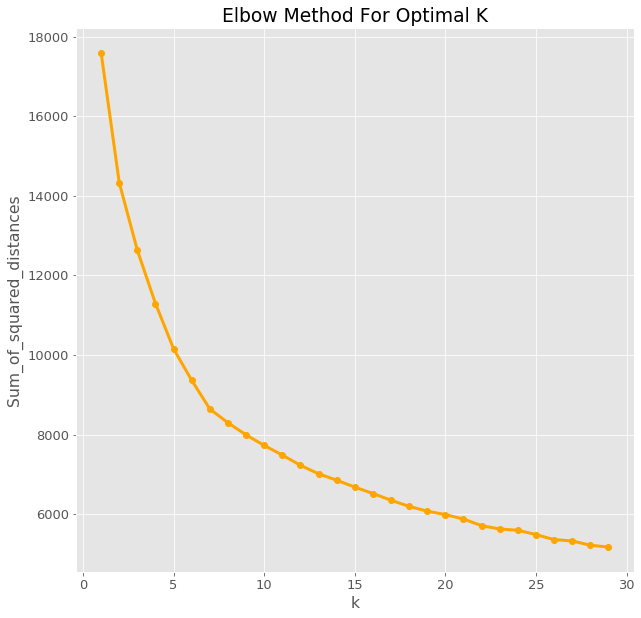

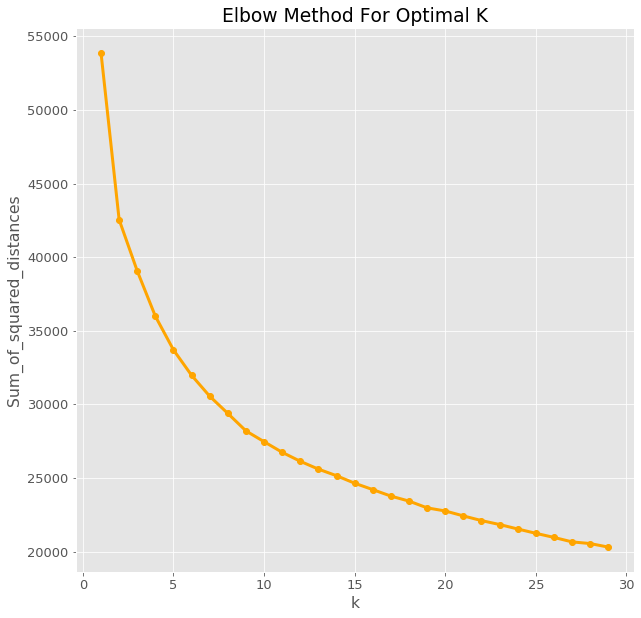

In [47]:
draw_k(1, 30, red_x)
draw_k(1, 30, white_x)

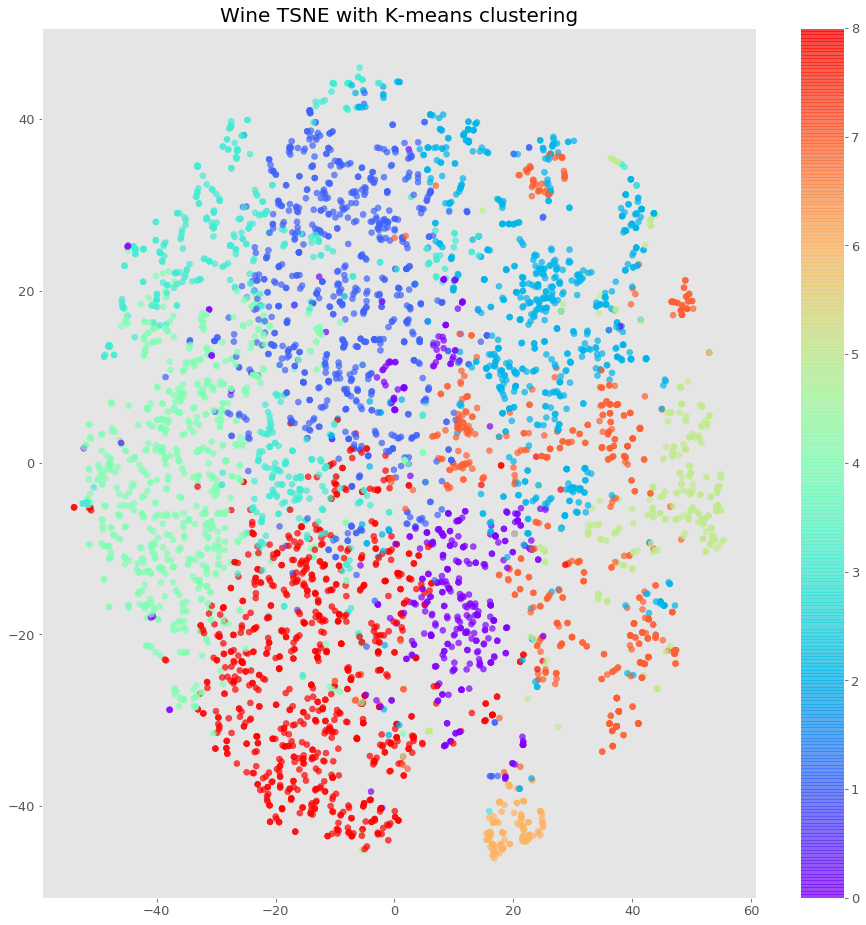

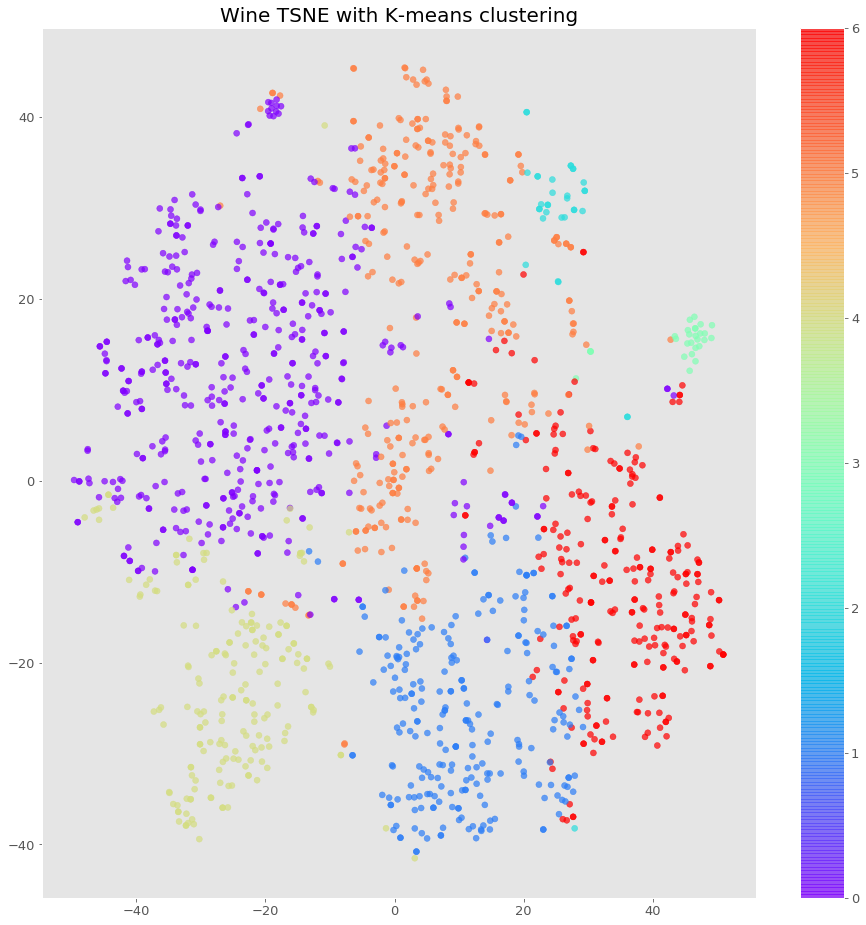

In [50]:
draw_kmean(9, white_x, get_tsne(white_x))
draw_kmean(7, red_x, get_tsne(red_x))

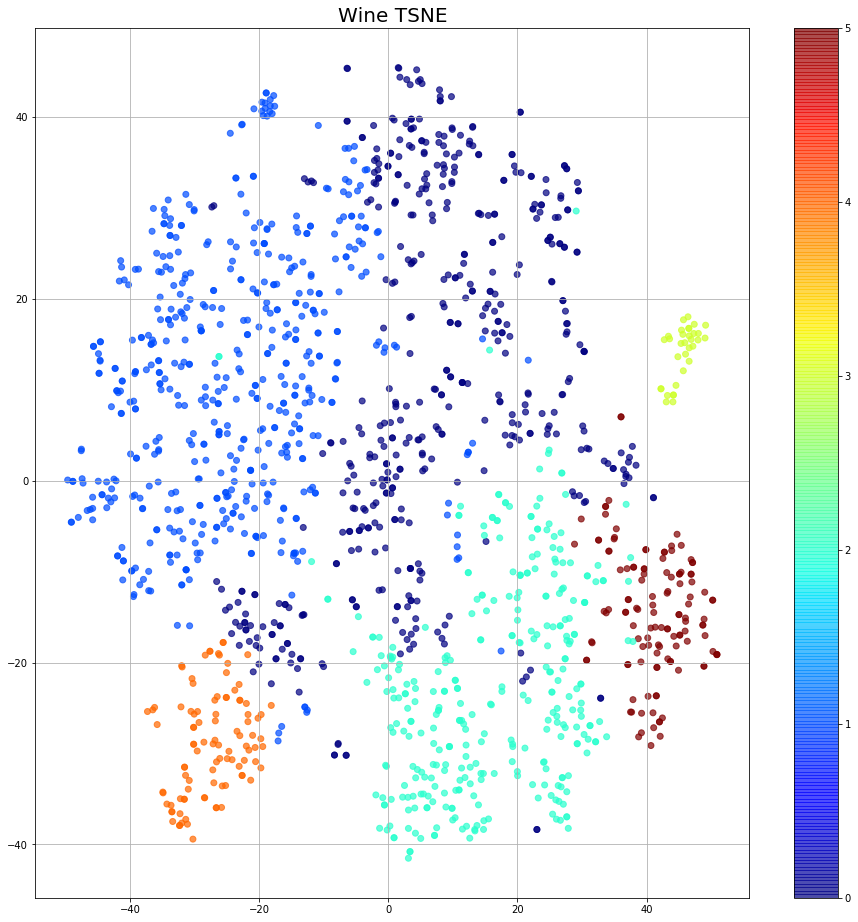

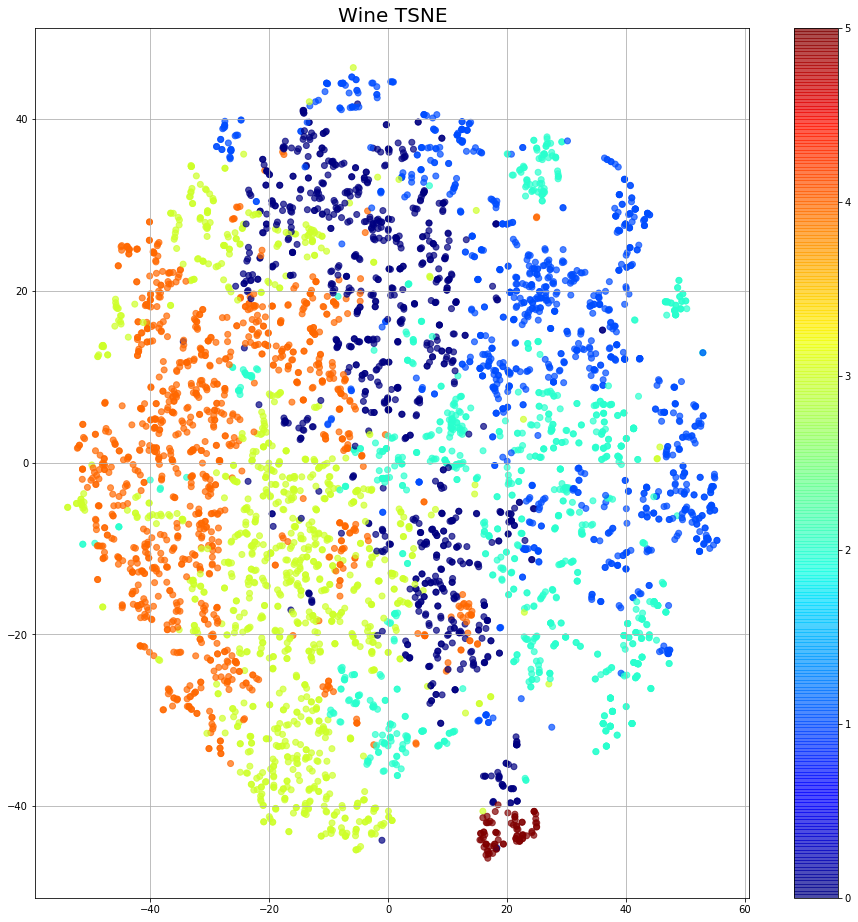

In [30]:
draw_tsne(redwine, red_x, get_tsne(red_x))
draw_tsne(whitewine, white_x, get_tsne(white_x))

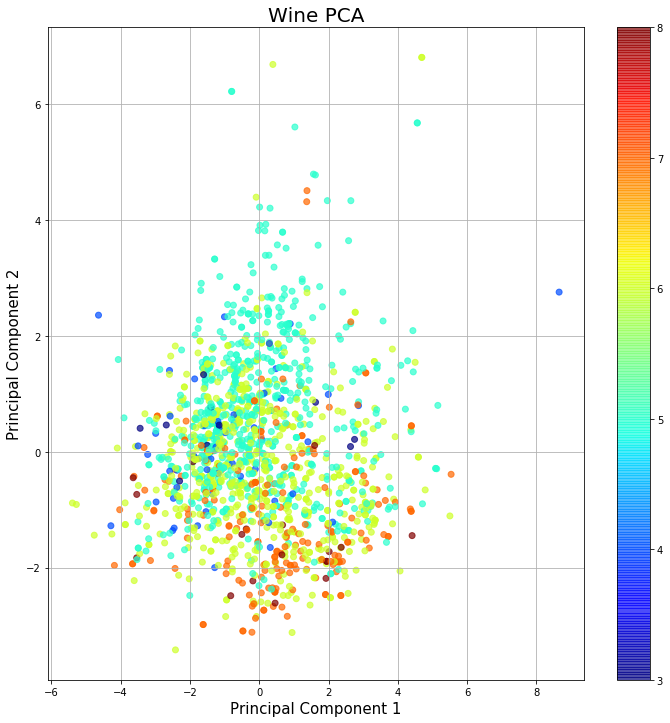

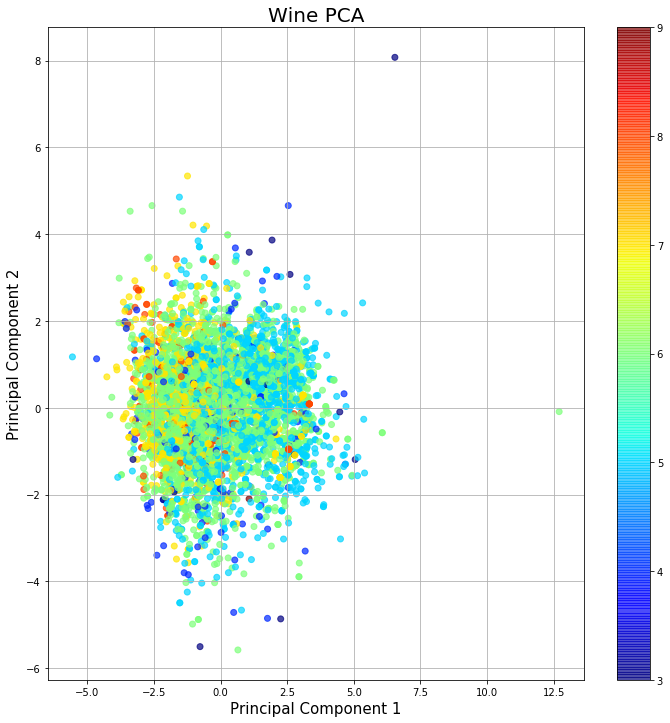

In [21]:
draw_pca(get_pca(redwine, red_x))
draw_pca(get_pca(whitewine, white_x))

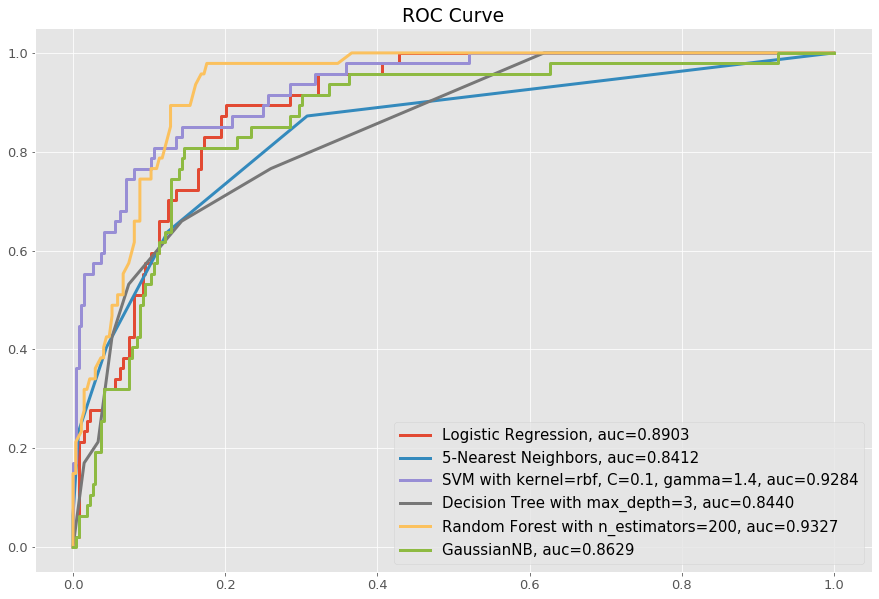

In [17]:
# 모든 모델들에서 가장 잘 나온 파라미터들에 대해 ROC커브 비교
model1 = LogisticRegression(max_iter=10000)
model2 = KNeighborsClassifier(n_neighbors = 5)
model3 = svm.SVC(kernel='rbf', C=0.1, gamma=1.4, probability=True)
model4 = tree.DecisionTreeClassifier(max_depth=3)
model5 = RandomForestClassifier(n_estimators=200) # 이 알고리즘의 특징은 Prec높은데 Recall 이 엉망인 것
model6 = GaussianNB()

modelname1 = 'Logistic Regression'
modelname2 = '5-Nearest Neighbors'
modelname3 = 'SVM with kernel=rbf, C=0.1, gamma=1.4'
modelname4 = 'Decision Tree with max_depth=3'
modelname5 = 'Random Forest with n_estimators=200'
modelname6 = 'GaussianNB'

models = [model1, model2, model3, model4, model5, model6]
modelnames = [modelname1, modelname2, modelname3, modelname4, modelname5, modelname6]

draw_ROC_curves(X_train, y_train, X_test, y_test, models, modelnames)